In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# - instead of opening a sperate window for the graphs, it displays it in the notebook
%matplotlib inline 

In [10]:
df = pd.read_csv("economic_index.csv")
df.head()

Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256

In [18]:
# dropping unnecessary columns
# df.drop(columns=["Unnamed: 0", "year", "month"], inplace=True)

In [19]:
df.head()

interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256

In [21]:
# checking if there are any null values present inside of our dataset
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

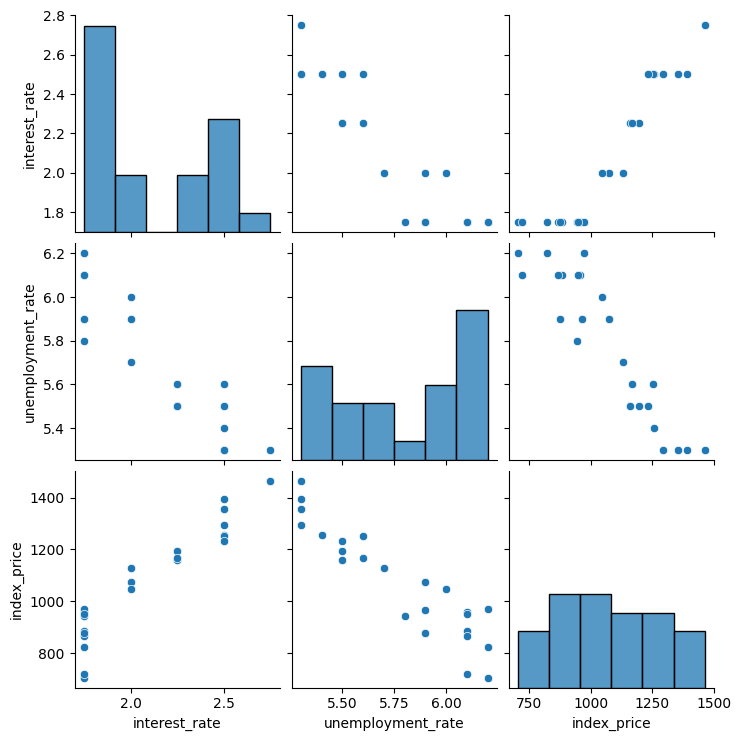

In [24]:
# visualizing our data in order to see the relationsip AKA correlation between our independent features and dependent featues
sns.pairplot(df)

In [25]:
df.corr()

interest_rate  unemployment_rate  index_price
interest_rate           1.000000          -0.925814     0.935793
unemployment_rate      -0.925814           1.000000    -0.922338
index_price             0.935793          -0.922338     1.000000

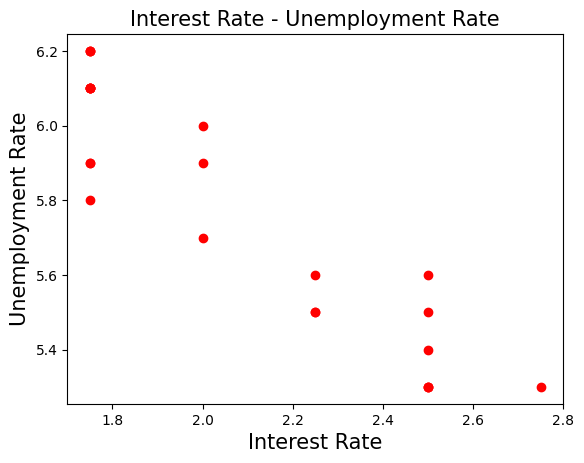

In [29]:
# visualizing data points more closely
plt.scatter(df["interest_rate"], df["unemployment_rate"], color="r")
plt.xlabel("Interest Rate", fontsize=15)
plt.ylabel("Unemployment Rate", fontsize=15)
plt.title("Interest Rate - Unemployment Rate", fontsize=15)
plt.show()

In [31]:
# independent and dependent features

# name = "moosa"
# print(name[:-1])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [34]:
X

interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

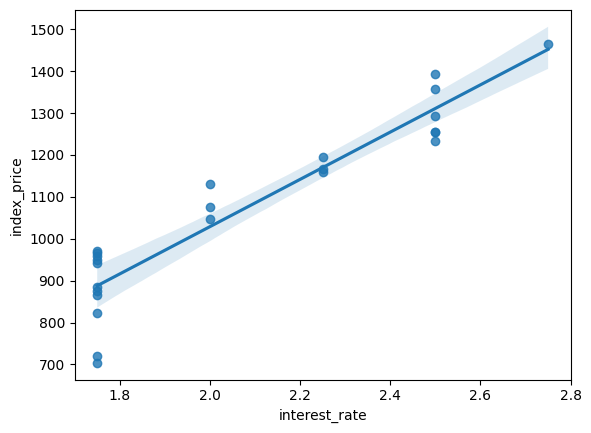

In [39]:
# this type of seaborn plot is very useful when working with multiple independent features for multiple linear regression
# this plots data in linear regression model fit
# this is not suitable for more than two features - only suitable for one indp and one dep feature

sns.regplot(x="interest_rate", y="index_price", data=df)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [45]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [46]:
regression.fit(X_train, y_train)

LinearRegression()

In [48]:
## cross validation - look into why do we use cross validation
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=3)

In [52]:
# we want to make some assumptions before we start predicting
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [56]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [55]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010254
0.5985619231683756


## Assumptions to check if our model is performing well or not

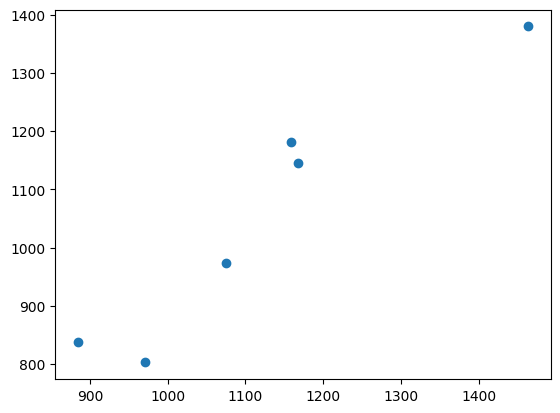

In [61]:
# ASSUMPTION: 1

# if there is a linear relationship between y_test and y_pred, then it means that our model is performming well
plt.scatter(y_test,y_pred)

plt.show()

In [59]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


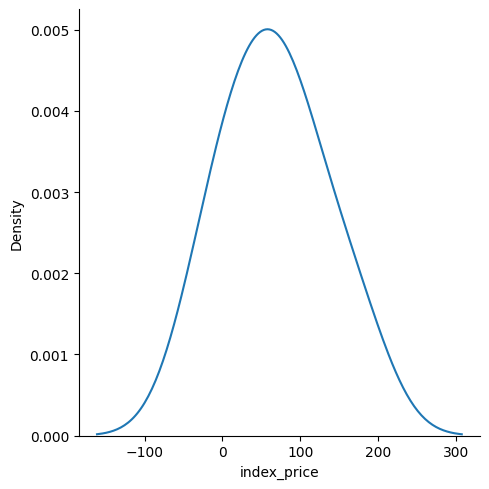

In [62]:
# ASSUMPTION: 2

# if we get this type of curve after plotting the model, then it means that our model is performing well
sns.displot(residuals,kind='kde')

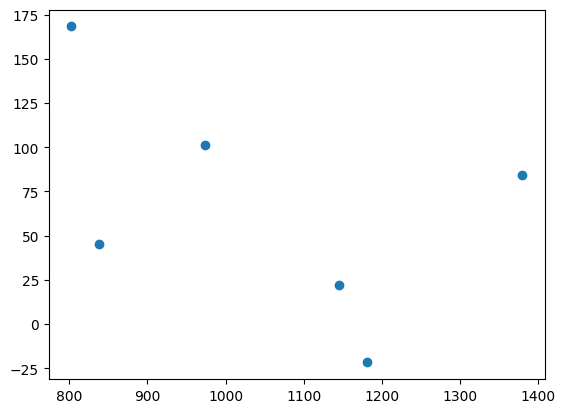

In [63]:
# ASSUMPTION: 3

# if data if uniforly distributed meaning that it follows no type of pattern, then it means that our model is performing well.
plt.scatter(y_pred,residuals)


In [64]:
# ------------------------------------------------- Multiple Linear Regression using OLS method -----------------------------
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [65]:
model.summary()

C:\Users\notmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                       0.754
Time:                        21:07:21   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [67]:
# look into multicolinearity